# EDA

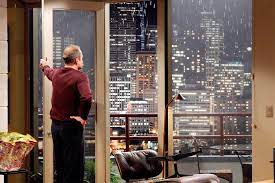

Bonnie Williams	-Seller-	

Has several houses, some in bad neighborhoods
willing to evict people
timing?
big returns, open for renovations

In [8]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
#import the house details from csv
df_houses = pd.read_csv('data/house_details.csv')

#display first 7 rows
df_houses.head(7)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2015-04-22,300000.000,1000102,2496
1,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,...,0.000,98002,47.326,-122.214,2060.000,7316.000,2014-09-16,280000.000,1000102,2495
2,1200019,4.000,1.750,2060.000,26036.000,1.000,NaN,0.000,4,8,...,0.000,98166,47.444,-122.351,2590.000,21891.000,2014-05-08,647500.000,1200019,6730
3,1200021,3.000,1.000,1460.000,43000.000,1.000,0.000,0.000,3,7,...,0.000,98166,47.443,-122.347,2250.000,20023.000,2014-08-11,400000.000,1200021,8405
4,2800031,3.000,1.000,1430.000,7599.000,1.500,0.000,0.000,4,6,...,0.000,98168,47.478,-122.265,1290.000,10320.000,2015-04-01,235000.000,2800031,8801
5,3600057,4.000,2.000,1650.000,3504.000,1.000,0.000,0.000,3,7,...,20130.000,98144,47.580,-122.294,1480.000,3504.000,2015-03-19,402500.000,3600057,3554
6,3600072,4.000,2.750,2220.000,5310.000,1.000,NaN,0.000,5,7,...,NaN,98144,47.580,-122.294,1540.000,4200.000,2015-03-30,680000.000,3600072,18507


In [208]:
#overview over the data
df_houses.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


<Axes: >

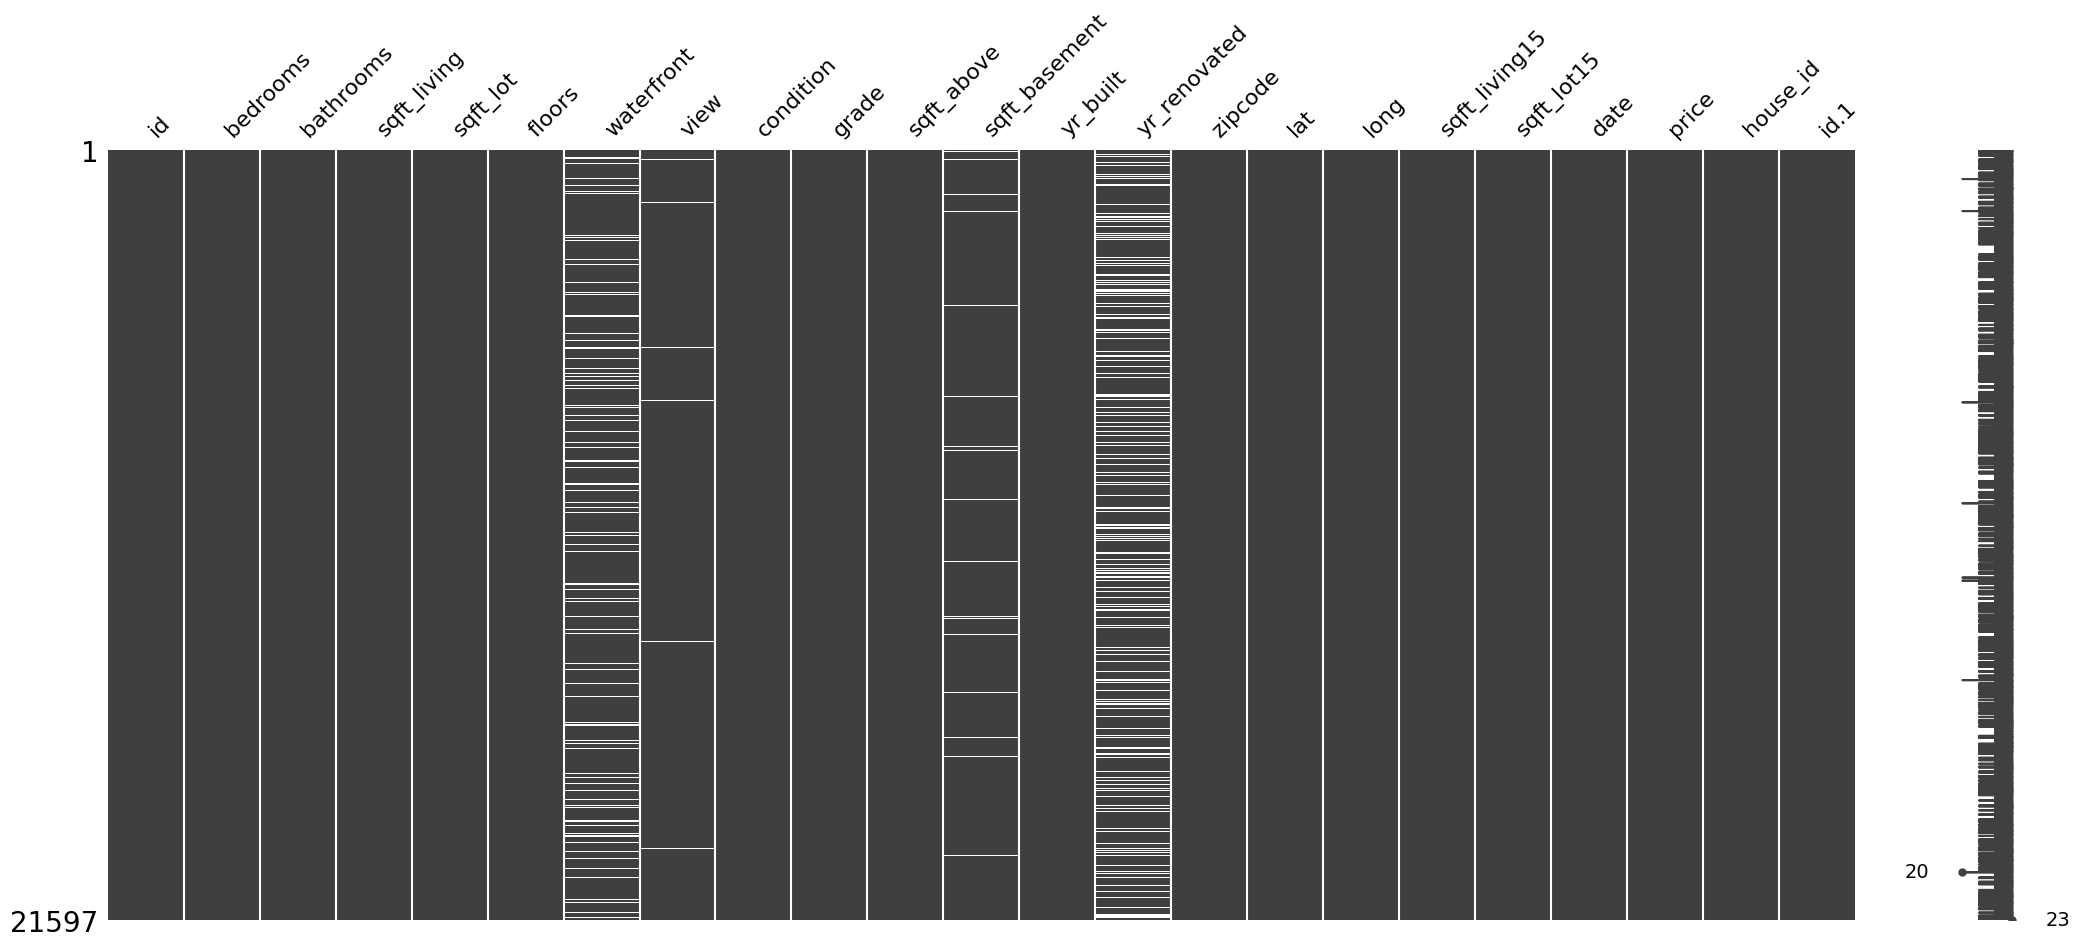

In [11]:
#import missingno and display the form of the dataframe
import missingno as msno
msno.matrix(df_houses)

In [12]:
# check how many duplicated rows exist in the data frame
df_houses.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [13]:
# check data types in data frame
df_houses.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

In [18]:
# change "date" dtype to datetime with format %Y/%m/%d
df_houses['date'] = pd.to_datetime(df_houses['date'], format="%Y-%m-%d")
df_houses.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id.1                      int64
dtype: object

<Axes: >

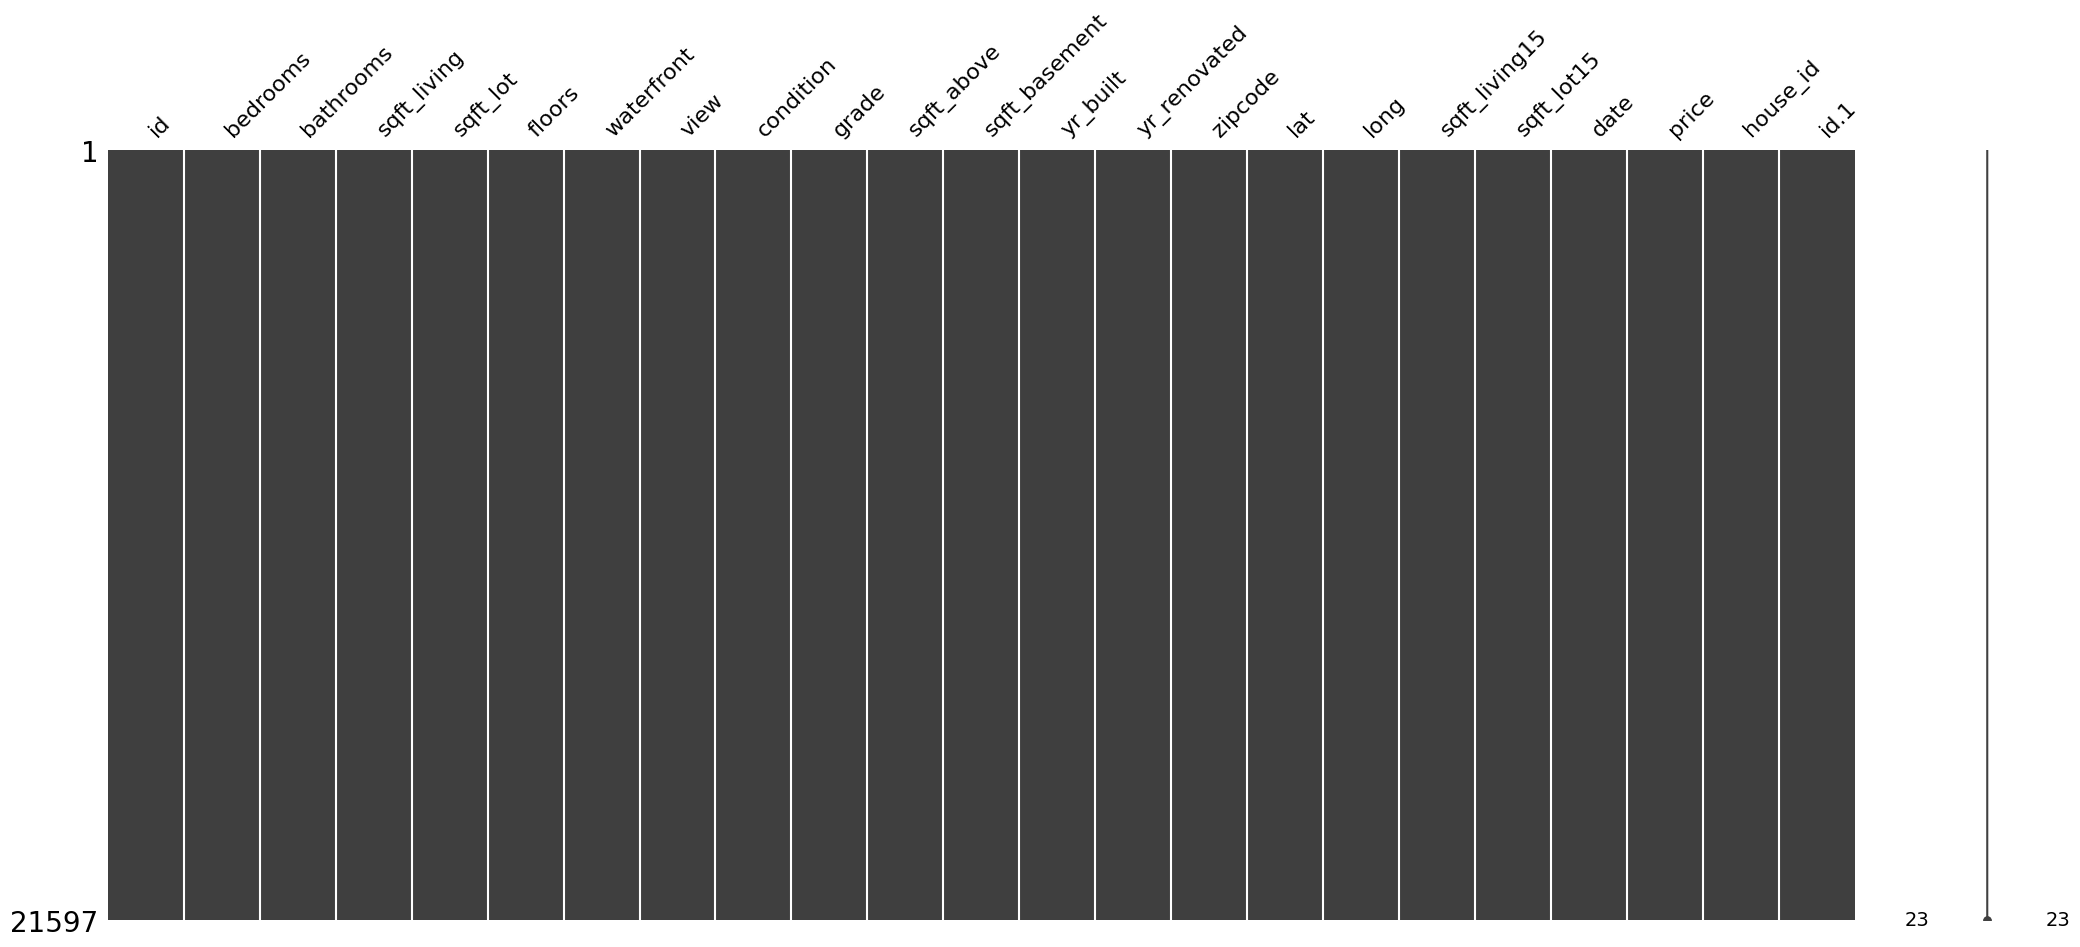

In [183]:
# create a copy of the dataset
df_houses_copied = df_houses.copy()

#fill missing cells with 0
houses_filled = df_houses_copied.fillna(0)

#check the form
msno.matrix(houses_filled)



In [ ]:
# Convert the 'ZipCode' column to string
houses_filled['zipcode'] = houses_filled['zipcode'].astype(str)

In [ ]:
# year is displayed with a 0 as last int
houses_filled['yr_renovated'].head(10)

In [ ]:
# removing the last 0
houses_filled['yr_renovated'] = houses_filled['yr_renovated'].apply(lambda x: x/10)
houses_filled['yr_renovated'].head(10)

Recommendation: which area has the cheapest houses with highest profit

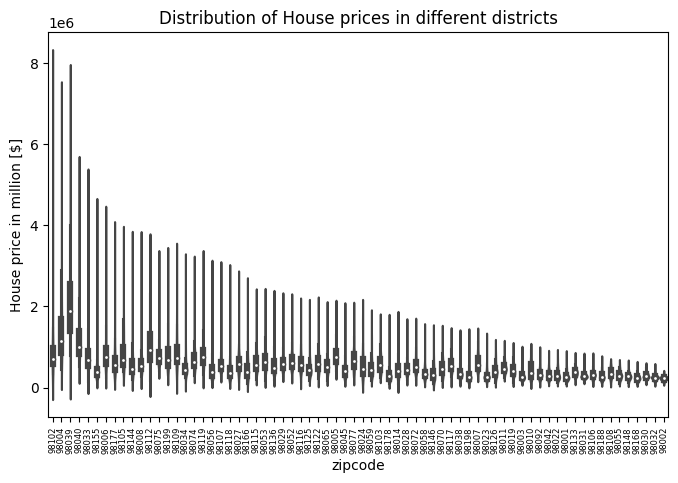

In [331]:

price_sorted = houses_filled.sort_values(by='price', ascending=False)

#plot of prices per district
ax = sns.violinplot(data= price_sorted, x= 'zipcode', y='price')

# Rotate x-axis tick labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_ylabel('House price in million [$]')
ax.set_title('Distribution of House prices in different districts')

# Show the plot
plt.show()

In [253]:
#searching for cheap houses
houses_filled['price'].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [254]:
#sort by the price
bottom_quantile = houses_filled['price'].quantile(0.25)

cheap_houses = houses_filled[houses_filled['price']<= bottom_quantile]

cheap_houses.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,...,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000,5406.000
mean,4538675489.933,3.036,1.664,1466.555,10436.148,1.275,0.000,0.039,3.411,6.805,...,148.045,1967.235,40.139,47.441,-122.226,1556.114,9780.113,251769.994,4538675489.933,10313.483
std,2854825509.156,0.800,0.615,470.464,23357.472,0.450,0.019,0.292,0.661,0.727,...,291.566,24.938,279.855,0.132,0.133,384.680,16490.894,48252.199,2854825509.156,5984.365
min,1000102.000,1.000,0.500,370.000,572.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,47.176,-122.512,460.000,651.000,78000.000,1000102.000,1.000
25%,2025701107.500,3.000,1.000,1110.000,6000.000,1.000,0.000,0.000,3.000,6.000,...,0.000,1951.000,0.000,47.341,-122.323,1280.000,6120.000,220000.000,2025701107.500,5268.500
50%,3832710900.000,3.000,1.750,1420.000,7788.500,1.000,0.000,0.000,3.000,7.000,...,0.000,1967.000,0.000,47.425,-122.263,1520.000,7805.500,259000.000,3832710900.000,10227.500
75%,7334501047.500,3.000,2.250,1780.000,9727.500,1.500,0.000,0.000,4.000,7.000,...,100.000,1986.000,0.000,47.508,-122.170,1790.000,9450.000,290000.000,7334501047.500,15431.250
max,9900000190.000,7.000,5.250,3490.000,1164794.000,3.000,1.000,4.000,5.000,10.000,...,1570.000,2015.000,2015.000,47.778,-121.315,3557.000,392040.000,322000.000,9900000190.000,21587.000


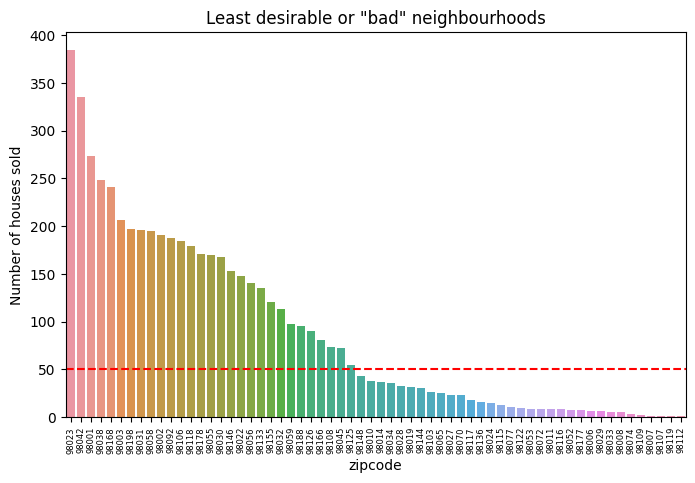

In [389]:
#descending order of house counts
house_count = cheap_houses['zipcode'].value_counts()
desc_order = house_count.nlargest(houses_filled['zipcode'].nunique()).index

#plot of cheap houses per district
ax = sns.countplot(data= cheap_sorted, x= 'zipcode', order=desc_order)

threshold1 = 50
plt.axhline(y=threshold1, color='r', linestyle='--', label='Threshold')

# Rotate x-axis tick labels to vertical and label plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
ax.set_ylabel('Number of houses sold')
ax.set_title('Least desirable or "bad" neighbourhoods')
# Show the plot
plt.show()

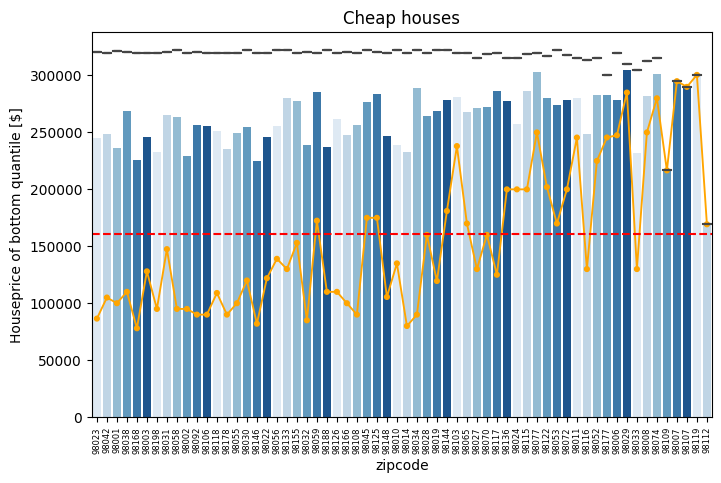

In [370]:

#sort by the max
cheap_sorted_max = cheap_houses.groupby(["zipcode"])['price'].aggregate(np.max).reset_index().sort_values('price', ascending=False)

#sort by the mean
cheap_sorted_mean = cheap_houses.groupby(["zipcode"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

#sort by the min
cheap_sorted_min = cheap_houses.groupby(["zipcode"])['price'].aggregate(np.min).reset_index().sort_values('price', ascending=False)


#to change color
palette1 = sns.color_palette("Blues") #to change color
#palette2 = sns.color_palette("Spectral")

#plot of cheap houses per district
ax = sns.boxplot(data= cheap_sorted_max, x= 'zipcode', y='price', order=desc_order)
ax = sns.barplot(data= cheap_sorted_mean, x= 'zipcode', y='price',order=desc_order,palette=palette1)
ax = sns.pointplot(data= cheap_sorted_min, x= 'zipcode', y='price', order=desc_order,color="orange",scale=0.5)#palette=palette2)

# Rotate x-axis tick labels to vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)

# Set your threshold value
threshold1 = bottom_quantile/2
#threshold2 = bottom_quantile/3

# Add a horizontal threshold line using axhline()
plt.axhline(y=threshold1, color='r', linestyle='--', label='Threshold')
#plt.axhline(x=threshold2, color='r', linestyle='--', label='Threshold')
ax.set_ylabel('Houseprice of bottom quantile [$]')
ax.set_title('Cheap houses')
# Show the plot
plt.show()

In [391]:
# List of zip codes to search for
to_search = ["98116", "98008", "98117", "98027", "98148", "98010", "98014", "98034","90019"]

#houses from the "bad" neighbourhoods
bad_houses = cheap_houses[(cheap_houses['zipcode'].isin(to_search)) & (cheap_houses["price"]<(bottom_quantile/2))].sort_values(by='price')

#filter by condition and grade
profitable_houses = bad_houses[(bad_houses["condition"]<=2) & (bad_houses["grade"]>=5)]

#write output to csv


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
5169,2023049218,2.000,1.000,930.000,7740.000,1.000,0.000,0.000,1,5,...,0.000,98148,47.461,-122.324,1620.000,8584.000,2014-07-16,105500.000,2023049218,13616
9492,3501100050,3.000,1.000,1230.000,4800.000,1.500,0.000,0.000,1,6,...,0.000,98117,47.694,-122.365,1230.000,4800.000,2014-12-10,125000.000,3501100050,16880
20387,9272202260,3.000,1.000,1200.000,7000.000,2.000,0.000,0.000,1,7,...,0.000,98116,47.588,-122.384,3290.000,6000.000,2014-09-24,130000.000,9272202260,18319


Recommendation: Which area has the ideal ratio of renovated/not renovated houses for maximum profit

In [289]:
#filter and count renovated houses
houses_renovated = cheap_houses[cheap_houses['yr_renovated'] > 0]
#filter and count not renovated houses
houses_not_renovated = cheap_houses[cheap_houses['yr_renovated'] == 0]

print(houses_renovated['yr_renovated'].count())
print(houses_not_renovated['yr_renovated'].count())


109
5297


In [290]:
#how many different districts are there
print(houses_filled['zipcode'].nunique())
print(houses_renovated['zipcode'].nunique())

70
44


In [291]:
#most common district with renovated
zip_mode = houses_renovated['zipcode'].mode().iloc[0]
zip_mode

'98022'

In [292]:
#renovated houses in the most appealing district
houses_renovated[houses_renovated['zipcode'] == zip_mode].sort_values(by='price')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
6103,2420069017,1.000,1.000,900.000,4368.000,1.000,0.000,0.000,5,6,...,1950.000,98022,47.211,-121.990,1290.000,5000.000,2015-03-24,152900.000,2420069017,2030
4749,1871400585,2.000,1.000,1020.000,13647.000,1.000,0.000,0.000,5,6,...,1974.000,98022,47.285,-121.927,980.000,8250.000,2015-04-22,160000.000,1871400585,17515
13837,6018500015,2.000,1.000,890.000,6430.000,1.000,0.000,0.000,3,6,...,1997.000,98022,47.200,-121.996,1460.000,6430.000,2014-07-11,199990.000,6018500015,18703
6106,2420069220,3.000,1.000,1320.000,3954.000,1.500,0.000,0.000,3,6,...,2014.000,98022,47.202,-121.994,1270.000,5184.000,2014-12-03,209000.000,2420069220,19160
13838,6018500120,2.000,1.000,900.000,5000.000,1.000,0.000,0.000,5,6,...,1990.000,98022,47.201,-121.995,1150.000,5000.000,2015-02-20,210000.000,6018500120,7779
18207,8029200190,3.000,1.000,1280.000,7198.000,1.000,0.000,0.000,5,6,...,1983.000,98022,47.209,-121.996,1260.000,7198.000,2014-11-07,227000.000,8029200190,5546
18206,8029200135,3.000,2.000,1270.000,7198.000,1.500,0.000,0.000,3,7,...,2013.000,98022,47.209,-121.996,1160.000,7198.000,2014-11-13,247000.000,8029200135,159
3994,1645000580,4.000,2.500,1900.000,8282.000,1.000,0.000,0.000,3,7,...,1997.000,98022,47.209,-122.003,1420.000,8350.000,2014-10-02,270000.000,1645000580,19234
6110,2420069278,3.000,2.500,1820.000,8722.000,1.500,0.000,0.000,3,7,...,2008.000,98022,47.214,-121.989,1480.000,12285.000,2015-03-19,287000.000,2420069278,8123
17305,7823700005,3.000,1.750,1940.000,7500.000,1.500,0.000,0.000,4,8,...,1985.000,98022,47.206,-121.993,1650.000,7500.000,2014-07-07,295000.000,7823700005,7363


In [337]:
#renovated houses in the most appealing district
houses_not_renovated[houses_not_renovated['zipcode'] == zip_mode].sort_values(by='price')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
4806,1917300025,2.000,1.000,860.000,6000.000,1.000,0.000,0.000,3,6,...,0.000,98022,47.211,-121.985,1300.000,6000.000,2015-01-27,122000.000,1917300025,3390
5899,2320069248,3.000,1.000,1200.000,8514.000,1.000,0.000,0.000,3,7,...,0.000,98022,47.204,-122.008,1210.000,8985.000,2014-07-01,165050.000,2320069248,1676
10085,3701900085,3.000,1.500,1570.000,6450.000,1.500,0.000,0.000,4,6,...,0.000,98022,47.202,-121.996,1400.000,6450.000,2014-08-05,169000.000,3701900085,8553
18140,8005100360,3.000,1.000,910.000,5800.000,1.500,0.000,0.000,4,5,...,0.000,98022,47.207,-121.992,1400.000,6766.000,2014-09-16,169900.000,8005100360,7843
6107,2420069242,2.000,1.000,740.000,3434.000,1.000,0.000,0.000,5,6,...,0.000,98022,47.209,-121.992,1160.000,6000.000,2014-09-25,175000.000,2420069242,15405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,2571900430,4.000,2.500,2740.000,8400.000,1.500,0.000,2.000,3,8,...,0.000,98022,47.195,-122.008,2030.000,8638.000,2014-09-23,315000.000,2571900430,7235
1189,561500290,3.000,1.750,1660.000,37642.000,1.000,0.000,0.000,4,7,...,0.000,98022,47.256,-122.007,2070.000,54450.000,2014-07-11,315000.000,561500290,6405
7038,2720069019,3.000,1.750,1120.000,98445.000,1.500,0.000,2.000,4,7,...,0.000,98022,47.185,-122.017,1620.000,34200.000,2014-11-03,316000.000,2720069019,19300
18332,8078490330,3.000,2.500,1980.000,9907.000,2.000,0.000,0.000,3,8,...,0.000,98022,47.190,-122.013,2050.000,9907.000,2014-09-16,319950.000,8078490330,13110
